Análisis de Componentes Principales (PCA)
=======================================

Es un método estadístico probabilístico que permite simplificar un conjunto de datos de alta dimensión a través de transformaciones lineales, reduciéndola a un conjunto de datos de menor dimensión y manteniendo la mayor cantidad de información posible. PCA es un método no supervisado, por lo que no se requiere información de la variable dependiente. El algoritmo es el siguiente:

1.- Se escalan los datos a media cero y varianza unitaria.

2.- Se calcula la matriz de covarianza de las $m$ variables y $x$ muestras.

3.- Se calculan los valores y vectores propios de la matriz de covarianza.

4.- Se escoge un porcentaje $p$ de la varianza explicada y se seleccionan los $k \le m$ valores propios más grandes tales que: $\sum_{i=1}^{k} \lambda_i \ge p \sum_{i=1}^{m} \lambda_i$.

5.- Los $k$ vectores propios asociados a estos valores son las componentes principales. El espacio $m$-dimensional se proyecta en un espacio $k$-dimensional.

Visualmente:

<center>

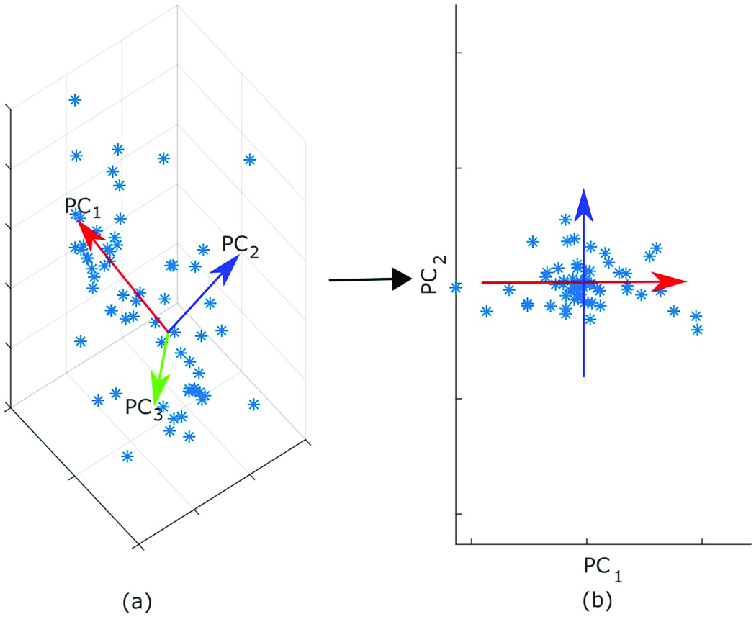

</center>

Implementación
==============

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./datasets/Wine.csv')
X = dataset.iloc[:, 0 : 13].values
Y = dataset.iloc[:, 13].values

In [19]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Vemos que las dos primeras componentes explican el 55% de la varianza
# Por lo que podemos reducir el número de variables a 2
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

[0.37043161 0.18576409 0.1099332  0.07657914 0.06344939 0.05033774
 0.04252947 0.02519874 0.02254869 0.01834638 0.01541152 0.01288671
 0.00658332]


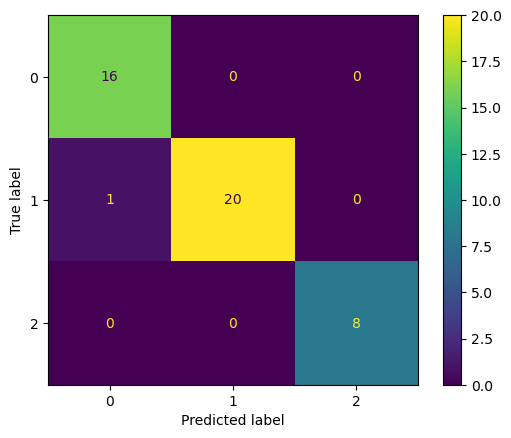

In [21]:
# Entrenamos el clasificador
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = classifier.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


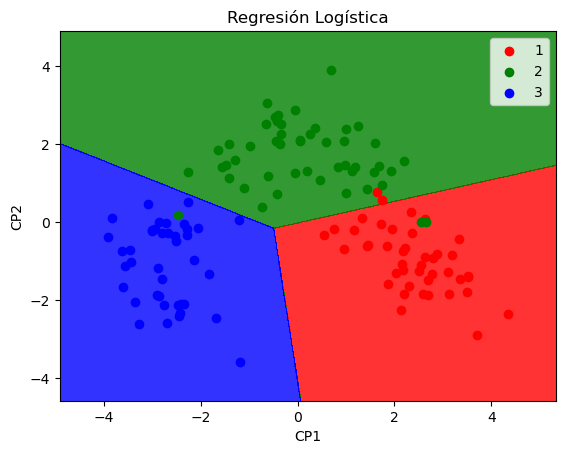

In [22]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Regresión Logística')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

Kernel PCA
==========

Es una extensión del PCA que permite aplicar el algoritmo a datos no linealmente separables. Básicamente se utiliza una función de kernel para transformar los datos en un espacio de mayor dimensión donde se puede aplicar el PCA.

Implementación
==============

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [24]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [25]:
# Aplicamos el Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

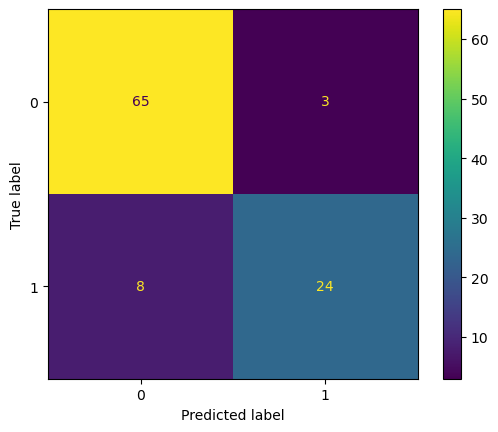

In [26]:
# Entrenamos el clasificador
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = classifier.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


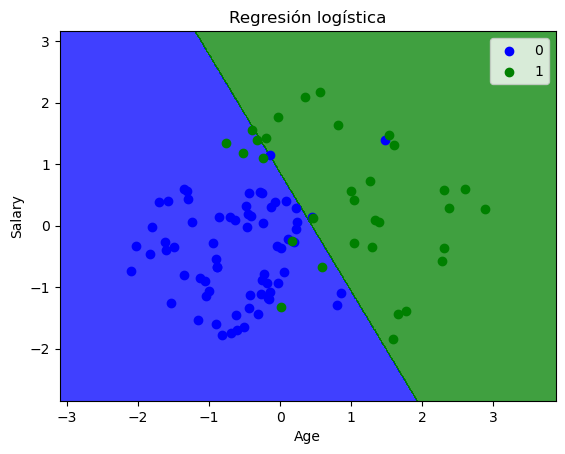

In [27]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, Y_set = X_test, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Regresión logística')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

Referencias:

https://www.cienciadedatos.net/documentos/35_principal_component_analysis